## Differential Equations

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode
import seaborn as sns
sns.set()

### Chaos System : 

#### Example 1 : Lorents Attractor

The Lorenz system is represented by a system of three coupled differential equations, and characterizes a system with three state variables (x,y,z).

$\begin{eqnarray}
\dot{x} &= &\sigma(y-x)\\
\dot{y} &= &(\rho-z)x - y\\
\dot{z} &= &xy-\beta z
\end{eqnarray}$

Setting constants to

$\begin{eqnarray}
\sigma &= &10\\
\rho &= &28\\
\beta &= &\frac{8}{3}
\end{eqnarray}$
 We get the following solution:

In [ ]:
def Lorenz(state,t):
  # unpack the state vector
  x = state[0]
  y = state[1]
  z = state[2]

  # these are our constants
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0

  # compute state derivatives
  xd = sigma * (y-x)
  yd = (rho-z)*x - y
  zd = x*y - beta*z

  # return the state derivatives
  return [xd, yd, zd]

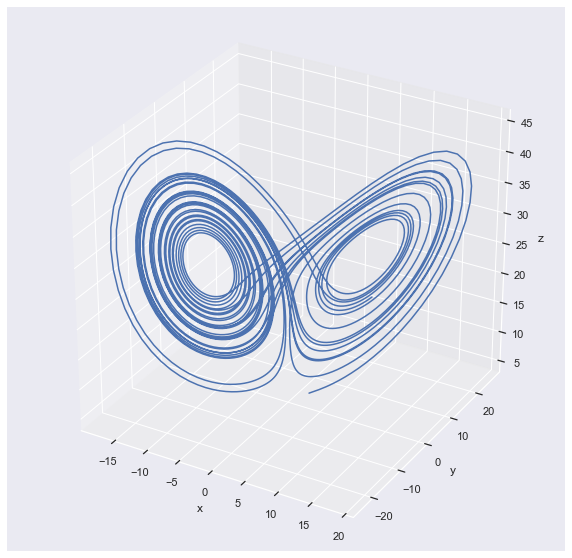

In [29]:
state0 = [2.0, 3.0, 4.0]
t = arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = [10,10])
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### 2. Double Pendulum :

 This code is taken form [GALILEO UNBOUND](https://galileo-unbound.blog/tag/python-code/) "Introduction to Modern Dynamics" 2nd Edition (Oxford, 2019) web page. 

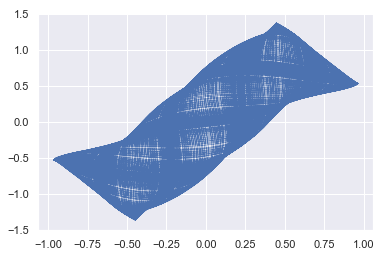

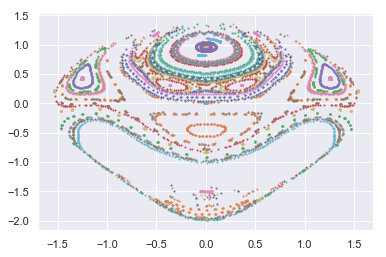

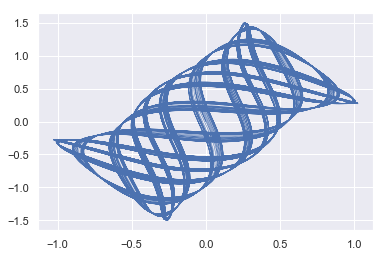

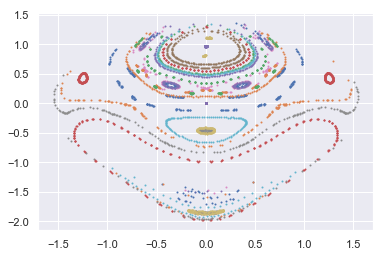

In [31]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Oct 16 06:03:32 2020
"Introduction to Modern Dynamics" 2nd Edition (Oxford, 2019)
@author: nolte
"""
 
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import time
 
plt.close('all')
 
E = 1.       # Try 0.8 to 1.5
 
def flow_deriv(x_y_z_w,tspan):
    x, y, z, w = x_y_z_w
 
    A = w**2*np.sin(y-x);
    B = -2*np.sin(x);
    C = z**2*np.sin(y-x)*np.cos(y-x);
    D = np.sin(y)*np.cos(y-x);
    EE = 2 - (np.cos(y-x))**2;
     
    FF = w**2*np.sin(y-x)*np.cos(y-x);
    G = -2*np.sin(x)*np.cos(y-x);
    H = 2*z**2*np.sin(y-x);
    I = 2*np.sin(y);
    JJ = (np.cos(y-x))**2 - 2;
 
    a = z
    b = w
    c = (A+B+C+D)/EE
    d = (FF+G+H+I)/JJ
    return[a,b,c,d]
 
repnum = 75
 
np.random.seed(1)
for reploop  in range(repnum):
     
     
    px1 = 2*(np.random.random((1))-0.499)*np.sqrt(E);
    py1 = -px1 + np.sign(np.random.random((1))-0.499)*np.sqrt(2*E - px1**2);            
 
    xp1 = 0   # Try 0.1
    yp1 = 0   # Try -0.2
     
    x_y_z_w0 = [xp1, yp1, px1, py1]
     
    tspan = np.linspace(1,1000,10000)
    x_t = integrate.odeint(flow_deriv, x_y_z_w0, tspan)
    siztmp = np.shape(x_t)
    siz = siztmp[0]
 
    if reploop % 50 == 0:
        plt.figure(2)
        lines = plt.plot(x_t[:,0],x_t[:,1])
        plt.setp(lines, linewidth=0.5)
        plt.show()
        time.sleep(0.1)
        #os.system("pause")
 
    y1 = np.mod(x_t[:,0]+np.pi,2*np.pi) - np.pi
    y2 = np.mod(x_t[:,1]+np.pi,2*np.pi) - np.pi
    y3 = np.mod(x_t[:,2]+np.pi,2*np.pi) - np.pi
    y4 = np.mod(x_t[:,3]+np.pi,2*np.pi) - np.pi
     
    py = np.zeros(shape=(10*repnum,))
    yvar = np.zeros(shape=(10*repnum,))
    cnt = -1
    last = y1[1]
    for loop in range(2,siz):
        if (last < 0)and(y1[loop] > 0):
            cnt = cnt+1
            del1 = -y1[loop-1]/(y1[loop] - y1[loop-1])
            py[cnt] = y4[loop-1] + del1*(y4[loop]-y4[loop-1])
            yvar[cnt] = y2[loop-1] + del1*(y2[loop]-y2[loop-1])
            last = y1[loop]
        else:
            last = y1[loop]
      
    plt.figure(3)
    lines = plt.plot(yvar,py,'o',ms=1)
    #plt.show()
     
#plt.savefig('DPen')
plt.show()

### References:
1. http://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html
2. http://folk.ntnu.no/leifh/teaching/tkt4140/._main055.html
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
4. https://gribblelab.org/compneuro2012/2_Modelling_Dynamical_Systems.html
5. https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html
6. https://en.wikibooks.org/wiki/Ordinary_Differential_Equations/Graphing_1
7. https://galileo-unbound.blog/tag/python-code/
8. https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/